<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/3_2_2_THEORY_APIs_with_Python_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs with Python Requests

The requests module allows you to send HTTP requests using Python. The HTTP request returns a Response Object with all the response data (content, encoding, status, etc).

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Requests_Python_Logo.png" alt="requests logo" width="200"/>

In [ ]:
# First let's install the library
!pip install requests

In [ ]:

import requests

import pandas as pd



## Scrapping HTML webpages

Python's requests package allow you to perform HTTP requests.

#### Perform HTTP Request

We will begin by creating a "url" variable that contains the URL of the webpage we want to retrieve data from. We can then use the "get" method, which performs the HTTP requests and returns a requests.Response Python object.

In [ ]:
url = 'https://raw.githubusercontent.com/kuemit/txt_book/master/examples/alice_in_wonderland.txt'
requests.get(url)

<Response [200]>

### The Response

A response is a powerful object for inspecting the results of a request. Make the same request again and store the return value in a variable so you can take a closer look at the data.

In [ ]:
response = requests.get(url)
print(type(response))

<class 'requests.models.Response'>


In [ ]:
# requests.text contains the HTTP response content body
text = response.text
print(text[:200])

TITLE: Alice's Adventures in Wonderland
AUTHOR: Lewis Carroll


= CHAPTER I = 
=( Down the Rabbit-Hole )=

  Alice was beginning to get very tired of sitting by her sister
on the bank, and of having n


In [ ]:
# access the response body as bytes (returns binary data)
response.content[:200]

b"TITLE: Alice's Adventures in Wonderland\nAUTHOR: Lewis Carroll\n\n\n= CHAPTER I = \n=( Down the Rabbit-Hole )=\n\n  Alice was beginning to get very tired of sitting by her sister\non the bank, and of having n"

Methods to access the details of the HTTP requests are also provided.

In [ ]:
# The request information is saved as a Python object in r.request:
print(response.request)

<PreparedRequest [GET]>


In [ ]:
# What were the HTTP request headers?
request_headers = response.request.headers
print(request_headers)

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [ ]:
request_headers['User-Agent']

'python-requests/2.32.3'

### Status Codes

The first bit of information you can gather from a response is the status code. This informs you of the status of the request. For Exp. 200 means the request was successful . whereas  404 = NOT FOUND, 403 = NOT Authorized etc.. 302 = Redirect

**Note**: *By accessing .status_code, you can see the status of the request returned from the Server.  Sometimes you might want to make decision in your code based upo the response "status code"*

In [ ]:
print(response.status_code)

200


Making decisions (Other Logic) based on status code:

In [ ]:
if response.status_code == 200:
  print("Success")
elif response.status_code == 400:
  print("Not Found")
elif response.status_code == 302:
  print("Follow Redirect")
elif response.status_code == 302:
  print("Not Authorized")

Success


In [ ]:
##################
##################
# Make an API call and store the response
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)
##################
##################

Status code: 200


## Working with APIs

### Working with the **Stars Wars API** (SWAPI) 🚀

In [ ]:
# Let's call the root endpoint.
# The Root resource provides information on all available resources within the API.
url = 'https://swapi.dev/api/'
response = requests.get(url, verify=False)

assert response.status_code == 200


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swapi.dev'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
response.content

b'{"people":"https://swapi.dev/api/people/","planets":"https://swapi.dev/api/planets/","films":"https://swapi.dev/api/films/","species":"https://swapi.dev/api/species/","vehicles":"https://swapi.dev/api/vehicles/","starships":"https://swapi.dev/api/starships/"}'

#### Getting response content as JSON

In [ ]:
response.json()

{'people': 'https://swapi.dev/api/people/',
 'planets': 'https://swapi.dev/api/planets/',
 'films': 'https://swapi.dev/api/films/',
 'species': 'https://swapi.dev/api/species/',
 'vehicles': 'https://swapi.dev/api/vehicles/',
 'starships': 'https://swapi.dev/api/starships/'}

In [ ]:
# Let's list all the movies
url = 'https://swapi.dev/api/films'
response = requests.get(url, verify=False)

assert response.status_code == 200

response.json()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swapi.dev'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'count': 6,
 'next': None,
 'previous': None,
 'results': [{'title': 'A New Hope',
   'episode_id': 4,
   'opening_crawl': "It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy....",
   'director': 'George Lucas',
   'producer': 'Gary Kurtz, Rick McCallum',
   'release_date': '1977-05-25',
   'characters': ['https://swapi.dev/api/people/1/',
    'https://swapi.dev/api/people/2/',
    'https://swapi.dev/api/people/3/',
    'https://swapi.dev/api/people/4/',
    'https://swapi.dev/api/peopl

#### Searching on SWAPI

All resources support a search parameter that filters the set of resources returned. This allows you to make queries like: https://swapi.dev/api/people/?search=r2.

With Python Requests we can use the `params` argument in the request, adding a dictionary with all the query strings.

In [ ]:
# Let's find all the Skywalker characters from movies.
url = 'https://swapi.dev/api/people/'
response = requests.get(url, params={"search": "Skywalker"}, verify=False)

assert response.status_code == 200

response.json()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swapi.dev'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'count': 3,
 'next': None,
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'Anakin Skywalker',
   'height': '188',
   'mass': '84',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '41.9BBY',
   'gender': 'male'

Using the `params` argument is not mandatory, you can see that adding the parameters directly in the URL will have the same effect.

In [ ]:
url = 'https://swapi.dev/api/people/?search=Skywalker'
response = requests.get(url, verify=False)

assert response.status_code == 200

response.json()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swapi.dev'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'count': 3,
 'next': None,
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'Anakin Skywalker',
   'height': '188',
   'mass': '84',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '41.9BBY',
   'gender': 'male'

### Working with **Coindesk** API 🤑

Let's see one last example: I will use the Coindesk API to get the historical bitcoin price.

We'll do a request using the parameters:

* market: which feed you want (here “cadli”)

* instrument: the trading pair (“BTC-USD”)

* limit: number of days back (60)

* aggregate: bucket size (1 day)

* fill & apply_mapping: whether to backfill missing days and apply their internal mapping logic

* response_format: JSON output

In [ ]:
# From: https://developers.coindesk.com/documentation/data-api/index_cc_v1_historical_days
url = 'https://data-api.coindesk.com/index/cc/v1/historical/days'
parameters = {"market":"cadli",
              "instrument":"BTC-USD",
              "limit":60,
              "aggregate":1,
              "fill":"true",
              "apply_mapping":"true",
              "response_format":"JSON"}

response = requests.get(url,
    params=parameters,
    headers={"Content-type":"application/json; charset=UTF-8"}
)

assert response.status_code == 200

data = response.json()

In [ ]:
data.keys()

dict_keys(['Data', 'Err'])

In [ ]:
data['Data'][0]

{'UNIT': 'DAY',
 'TIMESTAMP': 1740355200,
 'TYPE': '267',
 'MARKET': 'cadli',
 'INSTRUMENT': 'BTC-USD',
 'OPEN': 96292.8473302412,
 'HIGH': 96531.4844425039,
 'LOW': 91422.941833979,
 'CLOSE': 91605.4617630073,
 'FIRST_MESSAGE_TIMESTAMP': 1740355200,
 'LAST_MESSAGE_TIMESTAMP': 1740441599,
 'FIRST_MESSAGE_VALUE': 96292.8370437117,
 'HIGH_MESSAGE_VALUE': 96531.4844425039,
 'HIGH_MESSAGE_TIMESTAMP': 1740358339,
 'LOW_MESSAGE_VALUE': 91422.941833979,
 'LOW_MESSAGE_TIMESTAMP': 1740441449,
 'LAST_MESSAGE_VALUE': 91605.4617630073,
 'TOTAL_INDEX_UPDATES': 1350370,
 'VOLUME': 296625.914233889,
 'QUOTE_VOLUME': 28078398753.5608,
 'VOLUME_TOP_TIER': 168049.417082258,
 'QUOTE_VOLUME_TOP_TIER': 15895590990.6143,
 'VOLUME_DIRECT': 38334.45058014,
 'QUOTE_VOLUME_DIRECT': 3619589578.90774,
 'VOLUME_TOP_TIER_DIRECT': 32240.963371,
 'QUOTE_VOLUME_TOP_TIER_DIRECT': 3041933203.32235}

In [ ]:
import pandas as pd

df = pd.DataFrame(data['Data'])

In [ ]:
df['date'] = pd.to_datetime(df['TIMESTAMP'], unit='s', origin='unix')
df.set_index('date', inplace=True)

In [ ]:
df

,UNIT,TIMESTAMP,TYPE,MARKET,INSTRUMENT,OPEN,HIGH,LOW,CLOSE,FIRST_MESSAGE_TIMESTAMP,...,LAST_MESSAGE_VALUE,TOTAL_INDEX_UPDATES,VOLUME,QUOTE_VOLUME,VOLUME_TOP_TIER,QUOTE_VOLUME_TOP_TIER,VOLUME_DIRECT,QUOTE_VOLUME_DIRECT,VOLUME_TOP_TIER_DIRECT,QUOTE_VOLUME_TOP_TIER_DIRECT
date,,,,,,,,,,,,,,,,,,,,,
2025-02-24,DAY,1740355200,267,cadli,BTC-USD,96292.847330,96531.484443,91422.941834,91605.461763,1740355200,...,91605.461763,1350370,296625.914234,2.807840e+10,168049.417082,1.589559e+10,38334.450580,3.619590e+09,32240.963371,3.041933e+09
2025-02-25,DAY,1740441600,267,cadli,BTC-USD,91605.461763,92600.489559,86099.377849,88688.623552,1740441600,...,88688.623552,1373243,590258.170675,5.249456e+10,350347.446857,3.111930e+10,85918.855674,7.615306e+09,74713.014724,6.617813e+09
2025-02-26,DAY,1740528000,267,cadli,BTC-USD,88688.623552,89379.078579,82335.884305,84197.430023,1740528000,...,84197.430023,1544216,461217.126186,3.978324e+10,265805.294272,2.288114e+10,71440.619146,6.134328e+09,61007.855768,5.232443e+09
2025-02-27,DAY,1740614400,267,cadli,BTC-USD,84197.430023,87053.293843,82719.185184,84718.827505,1740614400,...,84718.827505,1737437,396622.431265,3.375399e+10,213223.126035,1.813157e+10,57577.465117,4.889564e+09,47800.741548,4.057013e+09
2025-02-28,DAY,1740700800,267,cadli,BTC-USD,84718.827505,85094.778677,78337.949863,84391.499733,1740700800,...,84391.499733,1554630,641802.583836,5.237052e+10,372070.200778,3.037437e+10,96912.720248,7.919868e+09,81930.868542,6.698313e+09
2025-03-01,DAY,1740787200,267,cadli,BTC-USD,84391.499733,86595.184275,83866.784385,86090.435142,1740787200,...,86090.435142,1533278,227440.000136,1.936814e+10,106309.489431,9.054840e+09,24947.906553,2.123648e+09,18807.313841,1.600999e+09
2025-03-02,DAY,1740873600,267,cadli,BTC-USD,86090.435142,95136.120027,85143.636068,94381.509291,1740873600,...,94381.509291,1132063,392350.962667,3.549781e+10,233735.690539,2.116421e+10,54570.899702,4.947540e+09,48944.516241,4.433631e+09
2025-03-03,DAY,1740960000,267,cadli,BTC-USD,94381.509291,94509.297901,85183.844733,86233.548839,1740960000,...,86233.548839,1313708,520935.348190,4.694035e+10,305155.992635,2.742096e+10,76541.772867,6.867124e+09,66697.682028,5.976635e+09
2025-03-04,DAY,1741046400,267,cadli,BTC-USD,86233.548839,88987.425389,81616.738226,87322.735751,1741046400,...,87322.735751,1327284,514479.385406,4.356871e+10,312203.628408,2.642841e+10,77724.489597,6.580330e+09,68328.885499,5.782389e+09


In [ ]:
df[['OPEN','HIGH','LOW','CLOSE','VOLUME']].describe()

,OPEN,HIGH,LOW,CLOSE,VOLUME
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,85039.747419,86868.778211,82902.421899,84994.688412,272506.119067
std,3789.049423,3565.048982,3573.239654,3667.072280,139534.477795
min,76270.133037,80841.478771,74496.578086,76270.133037,71598.189168
25%,83125.043441,84470.804739,81324.542181,83125.043441,186270.152140
50%,84385.184949,85689.545091,83087.874903,84385.184949,248026.694293
75%,86835.745073,88370.005258,84927.558676,86835.745073,332122.042078
max,96292.847330,96531.484443,91975.229658,94381.509291,641802.583836


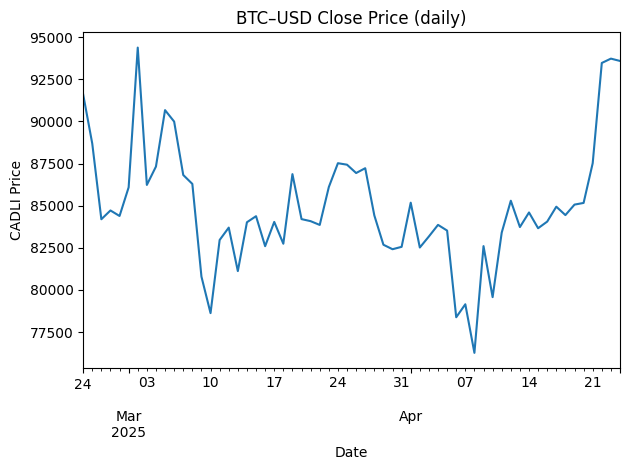

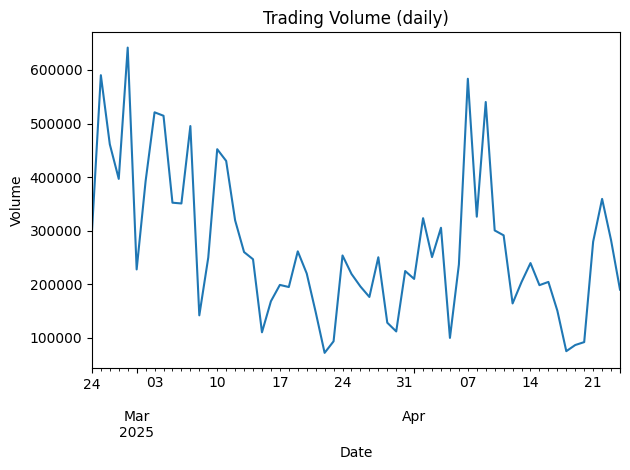

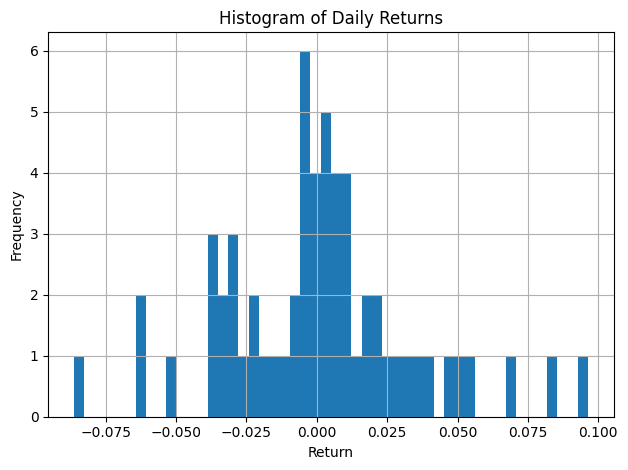

In [ ]:
import matplotlib.pyplot as plt

# Time-series plot of the closing price
plt.figure()
df['CLOSE'].plot(title='BTC–USD Close Price (daily)')
plt.xlabel('Date')
plt.ylabel('CADLI Price')
plt.tight_layout()
plt.show()

# Volume over time
plt.figure()
df['VOLUME'].plot(title='Trading Volume (daily)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

# Distribution of daily returns
returns = df['CLOSE'].pct_change().dropna()
plt.figure()
returns.hist(bins=50)
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()